In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import accuracy_score, classification_report
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
pd1 = pd.read_csv("problem_1/train.csv")

In [3]:
pd1.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [4]:
pd1.shape

(466, 11)

In [5]:
pd1.head(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,60,Male,6.3,3.2,314,118,114,6.6,3.7,1.27,1
1,31,Female,0.8,0.2,158,21,16,6.0,3.0,1.00,1
2,60,Male,19.6,9.5,466,46,52,6.1,2.0,0.40,1
3,34,Male,8.7,4.0,298,58,138,5.8,2.4,0.70,1
4,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1


In [6]:
pd1.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    3
Dataset                       0
dtype: int64

In [7]:
pd1[pd1['Albumin_and_Globulin_Ratio'].isnull()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
31,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
41,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2
188,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1


In [8]:
pd1['Albumin_and_Globulin_Ratio'].fillna((pd1['Albumin_and_Globulin_Ratio'].mean()),inplace=True)

In [9]:
pd1.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [10]:
pd1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466 entries, 0 to 465
Data columns (total 11 columns):
Age                           466 non-null int64
Gender                        466 non-null object
Total_Bilirubin               466 non-null float64
Direct_Bilirubin              466 non-null float64
Alkaline_Phosphotase          466 non-null int64
Alamine_Aminotransferase      466 non-null int64
Aspartate_Aminotransferase    466 non-null int64
Total_Protiens                466 non-null float64
Albumin                       466 non-null float64
Albumin_and_Globulin_Ratio    466 non-null float64
Dataset                       466 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 40.1+ KB


In [11]:
pd1.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000
mean,45.321888,3.406438,1.503004,294.877682,82.633047,114.982833,6.491845,3.149356,0.954104,1.285408
std,15.697936,6.510448,2.823700,252.718859,192.801900,312.869109,1.096455,0.805285,0.332568,0.452094
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,46.000000,1.000000,0.300000,210.000000,36.000000,42.000000,6.600000,3.100000,0.960000,1.000000
75%,58.000000,2.575000,1.300000,298.000000,60.000000,88.000000,7.200000,3.800000,1.100000,2.000000
max,85.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [12]:
pd1.corr()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,0.017007,0.004349,0.112266,-0.066935,0.005839,-0.202705,-0.281515,-0.220908,-0.136606
Total_Bilirubin,0.017007,1.000000,0.866070,0.153458,0.202096,0.227747,0.006593,-0.211662,-0.188044,-0.216970
Direct_Bilirubin,0.004349,0.866070,1.000000,0.186806,0.235821,0.260630,0.023680,-0.213277,-0.173664,-0.243594
Alkaline_Phosphotase,0.112266,0.153458,0.186806,1.000000,0.100744,0.151079,-0.023904,-0.165888,-0.239021,-0.187186
Alamine_Aminotransferase,-0.066935,0.202096,0.235821,0.100744,1.000000,0.784251,-0.033468,-0.010968,0.015316,-0.156944
Aspartate_Aminotransferase,0.005839,0.227747,0.260630,0.151079,0.784251,1.000000,-0.016300,-0.075667,-0.059740,-0.148021
Total_Protiens,-0.202705,0.006593,0.023680,-0.023904,-0.033468,-0.016300,1.000000,0.773420,0.214273,0.048957
Albumin,-0.281515,-0.211662,-0.213277,-0.165888,-0.010968,-0.075667,0.773420,1.000000,0.669463,0.182147
Albumin_and_Globulin_Ratio,-0.220908,-0.188044,-0.173664,-0.239021,0.015316,-0.059740,0.214273,0.669463,1.000000,0.171473
Dataset,-0.136606,-0.216970,-0.243594,-0.187186,-0.156944,-0.148021,0.048957,0.182147,0.171473,1.000000


In [13]:
pd1.drop(columns=['Total_Bilirubin'],inplace=True) # Total_Bilirubin is highly correlated to Direct_Bilirubin

In [14]:
dummy_sex = pd.get_dummies(pd1['Gender'],prefix='Gender',drop_first=True)
dummy_sex.head(5)

,Gender_Male
0,1
1,0
2,1
3,1
4,0


In [15]:
pd1 = pd.concat([dummy_sex,pd1],axis=1)
pd1.drop(columns=['Gender'],inplace=True)
pd1.head(5)

,Gender_Male,Age,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,1,60,3.2,314,118,114,6.6,3.7,1.27,1
1,0,31,0.2,158,21,16,6.0,3.0,1.00,1
2,1,60,9.5,466,46,52,6.1,2.0,0.40,1
3,1,34,4.0,298,58,138,5.8,2.4,0.70,1
4,0,26,0.2,154,16,12,7.0,3.5,1.00,1


In [16]:
X = pd1.drop(columns=['Dataset'])
y = pd1.Dataset

In [17]:
X.head(5)

,Gender_Male,Age,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,1,60,3.2,314,118,114,6.6,3.7,1.27
1,0,31,0.2,158,21,16,6.0,3.0,1.00
2,1,60,9.5,466,46,52,6.1,2.0,0.40
3,1,34,4.0,298,58,138,5.8,2.4,0.70
4,0,26,0.2,154,16,12,7.0,3.5,1.00


In [18]:
y.head(5)

0    1
1    1
2    1
3    1
4    1
Name: Dataset, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)

In [20]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

logistic.fit(X_train,y_train)
y_pred = logistic.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7350427350427351
              precision    recall  f1-score   support

           1       0.79      0.90      0.84        90
           2       0.36      0.19      0.24        27

   micro avg       0.74      0.74      0.74       117
   macro avg       0.57      0.54      0.54       117
weighted avg       0.69      0.74      0.70       117



/home/kartikchauhan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [21]:
list(zip([X.columns],logistic.coef_))

[(Index(['Gender_Male', 'Age', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
         'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
         'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio'],
        dtype='object'),
  array([ 0.06217716, -0.01181795, -0.40157579, -0.00120209, -0.00772887,
         -0.00227502, -0.24080481,  0.56407534, -0.07631176]))]

In [22]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.47863247863247865
              precision    recall  f1-score   support

           1       1.00      0.32      0.49        90
           2       0.31      1.00      0.47        27

   micro avg       0.48      0.48      0.48       117
   macro avg       0.65      0.66      0.48       117
weighted avg       0.84      0.48      0.48       117



In [23]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train,y_train)
y_pred = decisiontree.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.6581196581196581
              precision    recall  f1-score   support

           1       0.82      0.71      0.76        90
           2       0.33      0.48      0.39        27

   micro avg       0.66      0.66      0.66       117
   macro avg       0.58      0.60      0.58       117
weighted avg       0.71      0.66      0.68       117



In [24]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier()
randomforest.fit(X_train,y_train)
y_pred = randomforest.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7094017094017094
              precision    recall  f1-score   support

           1       0.80      0.83      0.82        90
           2       0.35      0.30      0.32        27

   micro avg       0.71      0.71      0.71       117
   macro avg       0.57      0.56      0.57       117
weighted avg       0.69      0.71      0.70       117



/home/kartikchauhan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Text(0, 0.5, 'Error Rate')

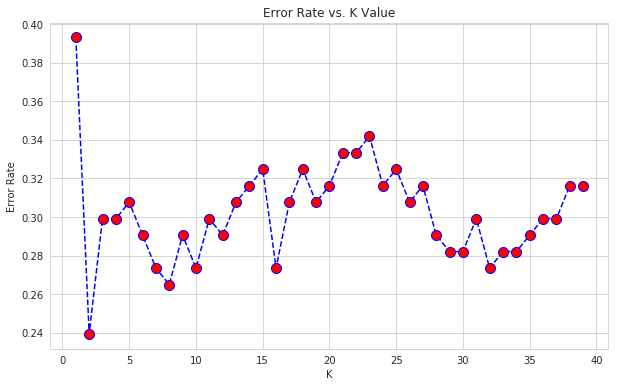

In [25]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [26]:
# KNN
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7264957264957265
              precision    recall  f1-score   support

           1       0.81      0.84      0.83        90
           2       0.39      0.33      0.36        27

   micro avg       0.73      0.73      0.73       117
   macro avg       0.60      0.59      0.59       117
weighted avg       0.71      0.73      0.72       117



In [27]:
# Support Vector Classifier
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7777777777777778
              precision    recall  f1-score   support

           1       0.78      1.00      0.87        90
           2       1.00      0.04      0.07        27

   micro avg       0.78      0.78      0.78       117
   macro avg       0.89      0.52      0.47       117
weighted avg       0.83      0.78      0.69       117



/home/kartikchauhan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# Before Scaling, maximum accuracy is achieved by Support Machine Algorithm i.e. 77.77%

# Scaling

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(pd1.drop(columns=['Gender_Male','Age','Dataset'],axis=1))

/home/kartikchauhan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [29]:
scaled_features = scaler.transform(pd1.drop(columns=['Gender_Male','Age','Dataset'],axis=1))
pd1_fet = pd.DataFrame(scaled_features,columns=pd1.columns[2:9])

/home/kartikchauhan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [30]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(pd1.drop(columns=['Gender_Male','Age','Total_Bilirubin','Direct_Bilirubin','Total_Protiens','Albumin','Dataset','Albumin_and_Globulin_Ratio'],axis=1))

In [31]:
# scaled_features = scaler.transform(pd1.drop(columns=['Gender_Male','Age','Total_Bilirubin','Direct_Bilirubin','Total_Protiens','Albumin','Dataset','Albumin_and_Globulin_Ratio'],axis=1))
# pd1_fet = pd.DataFrame(scaled_features,columns=pd1.columns[4:7])

In [32]:
pd1_fet.head(5)

,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,0.601629,0.075748,0.183634,-0.003145,0.098746,0.684523,0.950891
1,-0.461949,-0.542202,-0.320014,-0.316711,-0.449060,-0.185669,0.138154
2,2.835142,0.677853,-0.190208,-0.201524,-0.357759,-1.428801,-1.667928
3,0.885250,0.012368,-0.127901,0.073647,-0.631662,-0.931548,-0.764887
4,-0.461949,-0.558047,-0.345975,-0.329510,0.463950,0.435896,0.138154


In [33]:
# pd1_fet = pd.concat([pd1.iloc[:,[0,1,2,3,7,8,9]],pd1_fet],axis=1)

In [34]:
pd1_fet = pd.concat([pd1.iloc[:,[0,1]],pd1_fet],axis=1)

In [35]:
# pd1_fet.head(5)

In [36]:
X = pd1_fet

In [37]:
X.head(5)

,Gender_Male,Age,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,1,60,0.601629,0.075748,0.183634,-0.003145,0.098746,0.684523,0.950891
1,0,31,-0.461949,-0.542202,-0.320014,-0.316711,-0.449060,-0.185669,0.138154
2,1,60,2.835142,0.677853,-0.190208,-0.201524,-0.357759,-1.428801,-1.667928
3,1,34,0.885250,0.012368,-0.127901,0.073647,-0.631662,-0.931548,-0.764887
4,0,26,-0.461949,-0.558047,-0.345975,-0.329510,0.463950,0.435896,0.138154


In [38]:
# X.drop(columns=['Gender_Male','Age'],inplace=True)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)

In [40]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

logistic.fit(X_train,y_train)
y_pred = logistic.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7777777777777778
              precision    recall  f1-score   support

           1       0.82      0.91      0.86        90
           2       0.53      0.33      0.41        27

   micro avg       0.78      0.78      0.78       117
   macro avg       0.67      0.62      0.64       117
weighted avg       0.75      0.78      0.76       117



/home/kartikchauhan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [41]:
feature_cols = pd1_fet.columns

In [42]:
list(zip([feature_cols],logistic.coef_))

[(Index(['Gender_Male', 'Age', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
         'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
         'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio'],
        dtype='object'),
  array([-0.06020454, -0.01569332, -0.9557597 , -0.36656222, -0.96975879,
         -0.73017282, -0.58497963,  0.81074673, -0.26887958]))]

In [43]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.47863247863247865
              precision    recall  f1-score   support

           1       1.00      0.32      0.49        90
           2       0.31      1.00      0.47        27

   micro avg       0.48      0.48      0.48       117
   macro avg       0.65      0.66      0.48       117
weighted avg       0.84      0.48      0.48       117



In [44]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train,y_train)
y_pred = decisiontree.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.6410256410256411
              precision    recall  f1-score   support

           1       0.81      0.70      0.75        90
           2       0.31      0.44      0.36        27

   micro avg       0.64      0.64      0.64       117
   macro avg       0.56      0.57      0.56       117
weighted avg       0.69      0.64      0.66       117



In [45]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier()
randomforest.fit(X_train,y_train)
y_pred = randomforest.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.717948717948718
              precision    recall  f1-score   support

           1       0.81      0.83      0.82        90
           2       0.38      0.33      0.35        27

   micro avg       0.72      0.72      0.72       117
   macro avg       0.59      0.58      0.59       117
weighted avg       0.71      0.72      0.71       117



/home/kartikchauhan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Text(0, 0.5, 'Error Rate')

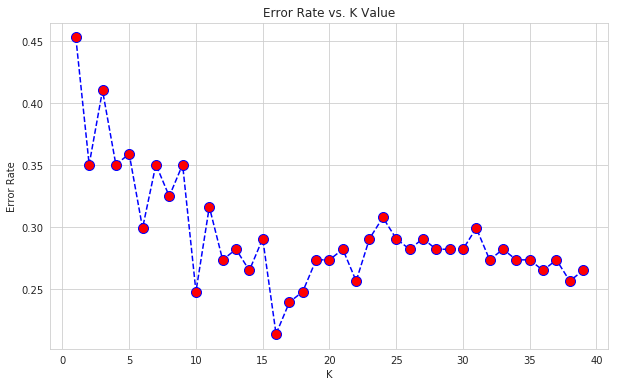

In [46]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [47]:
# KNN

knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7863247863247863
              precision    recall  f1-score   support

           1       0.79      0.98      0.88        90
           2       0.67      0.15      0.24        27

   micro avg       0.79      0.79      0.79       117
   macro avg       0.73      0.56      0.56       117
weighted avg       0.76      0.79      0.73       117



In [48]:
# Support Vector Classifier
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.6923076923076923
              precision    recall  f1-score   support

           1       0.77      0.86      0.81        90
           2       0.24      0.15      0.18        27

   micro avg       0.69      0.69      0.69       117
   macro avg       0.50      0.50      0.50       117
weighted avg       0.65      0.69      0.67       117



/home/kartikchauhan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# After Scaling, maximum accuracy is achieved by KNN algorithms i.e. 78.63%

# Prediction in Test Data

In [49]:
test_data = pd.read_csv("problem_1/test.csv")

In [50]:
test_data.head(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,46,Male,0.8,0.2,160,31,40,7.3,3.8,1.10
1,15,Male,0.8,0.2,380,25,66,6.1,3.7,1.50
2,66,Female,4.2,2.1,159,15,30,7.1,2.2,0.40
3,32,Male,0.6,0.1,237,45,31,7.5,4.3,1.34
4,60,Male,2.6,1.2,171,42,37,5.4,2.7,1.00


In [51]:
test_data.shape

(117, 10)

In [52]:
test_data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    1
dtype: int64

In [53]:
test_data['Albumin_and_Globulin_Ratio'].fillna((test_data['Albumin_and_Globulin_Ratio'].mean()),inplace=True)

In [54]:
test_data.drop(columns=['Total_Bilirubin'],inplace=True) # Total_Bilirubin is highly correlated to Direct_Bilirubin

In [55]:
dummy_sex = pd.get_dummies(test_data['Gender'],prefix='Gender',drop_first=True)
test_data = pd.concat([dummy_sex,test_data],axis=1)
test_data.drop(columns=['Gender'],inplace=True)
test_data.head(5)

,Gender_Male,Age,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,1,46,0.2,160,31,40,7.3,3.8,1.10
1,1,15,0.2,380,25,66,6.1,3.7,1.50
2,0,66,2.1,159,15,30,7.1,2.2,0.40
3,1,32,0.1,237,45,31,7.5,4.3,1.34
4,1,60,1.2,171,42,37,5.4,2.7,1.00


In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(test_data.drop(columns=['Gender_Male','Age'],axis=1))

scaled_features = scaler.transform(test_data.drop(columns=['Gender_Male','Age'],axis=1))
test_data_fet = pd.DataFrame(scaled_features,columns=test_data.columns[2:9])

test_data_fet = pd.concat([test_data.iloc[:,[0,1]],test_data_fet],axis=1)

/home/kartikchauhan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/kartikchauhan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [57]:
test_data_pred = knn.predict(test_data_fet)

In [58]:
test_data_pred

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1])

In [59]:
pred = pd.DataFrame(test_data_pred,columns=['Dataset'])

In [60]:
pred.shape

(117, 1)

In [61]:
test_data_fet.shape

(117, 9)

In [62]:
test_data_fet.head(5)

,Gender_Male,Age,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,1,46,-0.443812,-0.571640,-0.312817,-0.310198,0.818653,0.911643,0.715397
1,1,15,-0.443812,0.536927,-0.357432,-0.147952,-0.335352,0.779143,2.296085
2,0,66,0.248049,-0.576679,-0.431791,-0.372600,0.626319,-1.208352,-2.050806
3,1,32,-0.480226,-0.183641,-0.208714,-0.366360,1.010988,1.574142,1.663810
4,1,60,-0.079675,-0.516211,-0.231022,-0.328918,-1.008522,-0.545853,0.320226


In [63]:
pred.head(5)

,Dataset
0,1
1,1
2,1
3,1
4,2


In [64]:
predicted_test_data = pd.concat([test_data,pred],axis=1)

In [65]:
predicted_test_data.head(5)

,Gender_Male,Age,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,1,46,0.2,160,31,40,7.3,3.8,1.10,1
1,1,15,0.2,380,25,66,6.1,3.7,1.50,1
2,0,66,2.1,159,15,30,7.1,2.2,0.40,1
3,1,32,0.1,237,45,31,7.5,4.3,1.34,1
4,1,60,1.2,171,42,37,5.4,2.7,1.00,2


In [66]:
predicted_test_data.to_csv('Predicted Test Data Problem-1.csv',index=False)